(Group: Clinic 1 70)

(Martin Popov, Yuri Manna, Mateusz Zbos)

(i6316814, i6316134, i6329847)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (other)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [69]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── other_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `other_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [70]:
df_test = pd.read_csv('data/task_1/other_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [71]:
# clean the 'result' column
df_x['result'] = df_x['result'].str.strip().str.upper()
df_y['result'] = df_y['result'].str.strip().str.upper()
df_z['result'] = df_z['result'].str.strip().str.upper()

# valid inputs
valid_inputs = {"A", "B", "C", "D"}

# filter non-valid inputs and get the top 30
print("Top 30 non-valid inputs in LM X:")
print(df_x.loc[~df_x['result'].isin(valid_inputs), 'result'].value_counts().head(30))
print("\n")

print("Top 30 non-valid inputs in LM Y:")
print(df_y.loc[~df_y['result'].isin(valid_inputs), 'result'].value_counts().head(30))
print("\n")

print("Top 30 non-valid inputs in LM Z:")
print(df_z.loc[~df_z['result'].isin(valid_inputs), 'result'].value_counts().head(30))


Top 30 non-valid inputs in LM X:
result
ANSWER: A                                                                                                                                               1398
ANSWER: B                                                                                                                                                760
ANSWER: D                                                                                                                                                613
ANSWER: C                                                                                                                                                594
NOT SURE                                                                                                                                                  73
NONE OF THE ABOVE                                                                                                                                         69
WRONG, WRONG, SO T

# B
So basically there are various different types of "unexpected" inputs from the participants. Some of them write "Answer: X" which will be easy to clean up, but we also have LMs who straight up give us their entire logical process that leads them to a given answer. What is good is that it seems for those instances, the answer they choose always ends up being the final character in the input sentence, so it shoudn't be a difficult pre-process. Some have come up with an I don't know answer. Some have also stated "None of the above", which also isn't considered a valid input. All three score dataframes seem to have similar answers.


### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

I will take a side approach to the one suggested in point A, because it will mean we lose instances where the LM has given the logical process as well as providing an answer. Instead I will pre-process those instances so that give the answer at the end of the reasoning. Only then it uses the formula THE ANSWER IS or ANSWER:. For instances that have "None of the above" or indication other anwers without A,B,C or D, I will just put an "X" and consider it as "incorrect" later...

In [72]:
import re

# function to clean answers
def clean_answer(s):
    s = str(s).strip().upper()  # normalize case and remove spaces
    
   # completely invalid responses marked as "X"
    invalid_responses = {"NONE OF THE ABOVE", "NOT SURE", "DON'T KNOW", "UNKNOWN"}
    if s in invalid_responses:
        return "X"
    
    # match answers that are just a single letter (A, B, C, or D)
    if s in {"A", "B", "C", "D"}:
        return s

    # match responses that follow "ANSWER: " or "ANSWER IS "
    match = re.search(r"ANSWER[:\sIS]*([ABCD])\b", s)
    if match:
        return match.group(1)

    return "X"  # if nothing valid found, mark as "X"

# apply cleaning function to each dataframe
df_x['result'] = df_x['result'].apply(clean_answer)
df_y['result'] = df_y['result'].apply(clean_answer)
df_z['result'] = df_z['result'].apply(clean_answer)

# verify cleaning process
print("Cleaned LM X results:")
print(df_x['result'].value_counts())
print("\n")

print("Cleaned LM Y results:")
print(df_y['result'].value_counts())
print("\n")

print("Cleaned LM Z results:")
print(df_z['result'].value_counts())


Cleaned LM X results:
result
A    5844
B    3003
C    2373
D    2350
X     312
Name: count, dtype: int64


Cleaned LM Y results:
result
D    5808
C    3274
B    2545
A    2054
X     297
Name: count, dtype: int64


Cleaned LM Z results:
result
D    3498
C    3406
B    3278
A    3152
X     589
Name: count, dtype: int64


In [73]:
# We now clean the data from the anwers that we marked as incorrect (X)
# original sizes
original_sizes = {
    "LM X": len(df_x),
    "LM Y": len(df_y),
    "LM Z": len(df_z)
}

# remove all values marked as "X"
df_x_clean = df_x[df_x['result'] != "X"]
df_y_clean = df_y[df_y['result'] != "X"]
df_z_clean = df_z[df_z['result'] != "X"]

# cleaned sizes after filtering
cleaned_sizes = {
    "LM X": len(df_x_clean),
    "LM Y": len(df_y_clean),
    "LM Z": len(df_z_clean)
}

# convert to DataFrame for better visualization
comparison_df = pd.DataFrame([original_sizes, cleaned_sizes], index=["Original Size", "Cleaned Size"])

# comparison table
print(comparison_df)


                LM X   LM Y   LM Z
Original Size  13882  13978  13923
Cleaned Size   13570  13681  13334


We cleaned up the data and managed to mantain almost all instances. Now the result column follows our desired format.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `other` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [74]:
# inner join on question_id
df_x_merged = df_x_clean.merge(df_test, on="question_id", how="inner")
df_y_merged = df_y_clean.merge(df_test, on="question_id", how="inner")
df_z_merged = df_z_clean.merge(df_test, on="question_id", how="inner")


In [75]:
# B
# add 'correct' column 
df_x_merged['correct'] = (df_x_merged['result'] == df_x_merged['answer']).astype(int)
df_y_merged['correct'] = (df_y_merged['result'] == df_y_merged['answer']).astype(int)
df_z_merged['correct'] = (df_z_merged['result'] == df_z_merged['answer']).astype(int)

# average accuracy for each model
score_x = df_x_merged['correct'].mean()
score_y = df_y_merged['correct'].mean()
score_z = df_z_merged['correct'].mean()

# results
print(f"LM X Accuracy: {score_x:.4f} ({score_x * 100:.2f}%)")
print(f"LM Y Accuracy: {score_y:.4f} ({score_y * 100:.2f}%)")
print(f"LM Z Accuracy: {score_z:.4f} ({score_z * 100:.2f}%)")


LM X Accuracy: 0.7678 (76.78%)
LM Y Accuracy: 0.7456 (74.56%)
LM Z Accuracy: 0.6624 (66.24%)


I got different prints from the ones that were initially shown, but I don't think that's a big deal, as the values are similar (apart from the third set, where the accuracy decreased with almost 10%).

### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [76]:
#A
# number of questions answered per subject for each model
subject_counts_x = df_x_merged['subject'].value_counts()
subject_counts_y = df_y_merged['subject'].value_counts()
subject_counts_z = df_z_merged['subject'].value_counts()

# combine into a DataFrame
subject_counts = pd.DataFrame({
    "LM X": subject_counts_x,
    "LM Y": subject_counts_y,
    "LM Z": subject_counts_z
}).fillna(0).astype(int)  # fill missing subjects with 0 and ensure integer type

# identify subjects with >10% difference
unbalanced_subjects = []
for subject in subject_counts.index:
    counts = subject_counts.loc[subject]
    
    # pairwise percentage differences
    diffs = [
        abs(counts["LM X"] - counts["LM Y"]) / (min(counts["LM X"], counts["LM Y"]) + 1e-6),
        abs(counts["LM X"] - counts["LM Z"]) / (min(counts["LM X"], counts["LM Z"]) + 1e-6),
        abs(counts["LM Y"] - counts["LM Z"]) / (min(counts["LM Y"], counts["LM Z"]) + 1e-6),
    ]
    
    # if any difference is >10%, flag the subject
    if any(diff > 0.10 for diff in diffs):
        unbalanced_subjects.append(subject)

# unbalanced subjects:
print("Subjects with >10% difference in question count:")
print(subject_counts.loc[unbalanced_subjects],)



Subjects with >10% difference in question count:
                   LM X  LM Y  LM Z
subject                            
college chemistry    96   100    90
formal logic        111   124   119
logical fallacies   154   136   155
moral disputes      330   306   263
moral scenarios     743   871   810


To rebalance, I will find the minimum number of questions answered for each subject across the models and then randomly sample that number from each model's dataset. We ensure that we keep as much data as possible whilst having fair comparison.

In [77]:
#B


def rebalance_data(df_merged, subject_counts_x, subject_counts_y, subject_counts_z):
    rebalanced_df = []
    
    for subject in df_merged['subject'].unique():
        subject_df = df_merged[df_merged['subject'] == subject]
        
        # minimum count across all three models
        min_count = min(
            subject_counts_x.get(subject, np.inf),
            subject_counts_y.get(subject, np.inf),
            subject_counts_z.get(subject, np.inf),
        )

        # if the subject appears in the unbalanced subjects list, sample down
        if subject in unbalanced_subjects and len(subject_df) > min_count:
            subject_df = subject_df.sample(n=int(min_count), random_state=42)

        rebalanced_df.append(subject_df)

    return pd.concat(rebalanced_df).reset_index(drop=True)

# rebalancing
df_x_balanced = rebalance_data(df_x_merged, subject_counts_x, subject_counts_y, subject_counts_z)
df_y_balanced = rebalance_data(df_y_merged, subject_counts_x, subject_counts_y, subject_counts_z)
df_z_balanced = rebalance_data(df_z_merged, subject_counts_x, subject_counts_y, subject_counts_z)

# before & after sizes
print("Before rebalance:")
print(subject_counts.loc[unbalanced_subjects])

print("\nAfter rebalance:")
balanced_counts = pd.DataFrame({
    "LM X": df_x_balanced['subject'].value_counts(),
    "LM Y": df_y_balanced['subject'].value_counts(),
    "LM Z": df_z_balanced['subject'].value_counts()
}).fillna(0).astype(int)

print(balanced_counts.loc[unbalanced_subjects])


Before rebalance:
                   LM X  LM Y  LM Z
subject                            
college chemistry    96   100    90
formal logic        111   124   119
logical fallacies   154   136   155
moral disputes      330   306   263
moral scenarios     743   871   810

After rebalance:
                   LM X  LM Y  LM Z
subject                            
college chemistry    90    90    90
formal logic        111   111   111
logical fallacies   136   136   136
moral disputes      263   263   263
moral scenarios     743   743   743


In [78]:
#C
# correctness for balanced datasets
df_x_balanced['correct'] = (df_x_balanced['result'] == df_x_balanced['answer']).astype(int)
df_y_balanced['correct'] = (df_y_balanced['result'] == df_y_balanced['answer']).astype(int)
df_z_balanced['correct'] = (df_z_balanced['result'] == df_z_balanced['answer']).astype(int)

# new accuracy
score_x_balanced = df_x_balanced['correct'].mean()
score_y_balanced = df_y_balanced['correct'].mean()
score_z_balanced = df_z_balanced['correct'].mean()

# results
print(f"Rebalanced LM X Accuracy: {score_x_balanced:.4f} ({score_x_balanced * 100:.2f}%)")
print(f"Rebalanced LM Y Accuracy: {score_y_balanced:.4f} ({score_y_balanced * 100:.2f}%)")
print(f"Rebalanced LM Z Accuracy: {score_z_balanced:.4f} ({score_z_balanced * 100:.2f}%)")


Rebalanced LM X Accuracy: 0.7680 (76.80%)
Rebalanced LM Y Accuracy: 0.7461 (74.61%)
Rebalanced LM Z Accuracy: 0.6622 (66.22%)


It seems that the balancing is not influencint the results as much, as there was minimal change to their accuracy. 

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [79]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [80]:
#A

# mean accuracy and standard error for each model in both datasets
def compute_stats(df, dataset_name):
    stats_df = df.groupby("model_name")["correct"].agg(["mean", "count", "std"])
    stats_df["stderr"] = stats_df["std"] / np.sqrt(stats_df["count"])  # Standard error
    stats_df = stats_df[["mean", "stderr"]].rename(columns={"mean": "accuracy"})
    
    print(f"Mean Accuracy & Standard Error", dataset_name)
    print('\n',stats_df)
    return stats_df

# stats for both datasets
mmlu_stats = compute_stats(df_mmlu, "MMLU")
print("\n")
other_stats = compute_stats(df_other, "Other Dataset")


Mean Accuracy & Standard Error MMLU

             accuracy    stderr
model_name                    
X           0.743588  0.004038
Y           0.761542  0.003941
Z           0.655951  0.004393


Mean Accuracy & Standard Error Other Dataset

             accuracy    stderr
model_name                    
X           0.787976  0.006668
Y           0.720936  0.007317
Z           0.671721  0.007660


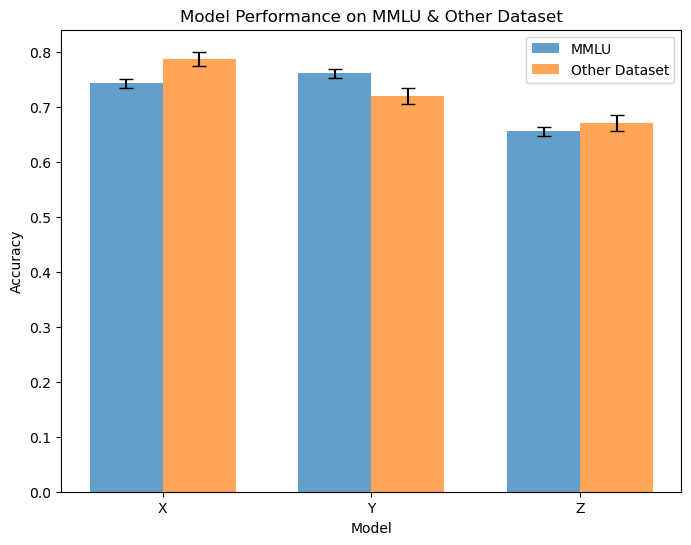

In [81]:
#B

# plot results with error bars
def plot_results(mmlu_stats, other_stats):
    models = mmlu_stats.index

    # extract values
    accuracies_mmlu = mmlu_stats["accuracy"]
    errors_mmlu = mmlu_stats["stderr"]
    accuracies_other = other_stats["accuracy"]
    errors_other = other_stats["stderr"]

    # bar plot setup
    x = np.arange(len(models))
    width = 0.35  # Width of bars

    fig, ax = plt.subplots(figsize=(8, 6))
    
    # plot bars with error bars (95% CI)
    ax.bar(x - width/2, accuracies_mmlu, width, yerr=errors_mmlu * 1.96, capsize=5, label="MMLU", alpha=0.7)
    ax.bar(x + width/2, accuracies_other, width, yerr=errors_other * 1.96, capsize=5, label="Other Dataset", alpha=0.7)

    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy")
    ax.set_title("Model Performance on MMLU & Other Dataset")
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    
    plt.show()

# results
plot_results(mmlu_stats, other_stats)


### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

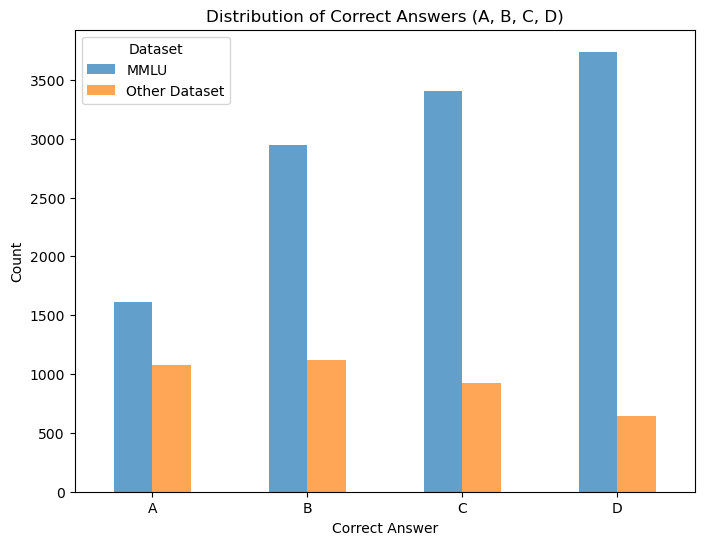

        MMLU  Other Dataset
answer                     
A       1611           1078
B       2943           1116
C       3403            924
D       3739            641


In [82]:
#A 

# correct answers for each unique question
mmlu_correct_counts = df_mmlu.groupby("question_id")["answer"].first().value_counts()
other_correct_counts = df_other.groupby("question_id")["answer"].first().value_counts()

answer_distribution = pd.DataFrame({
    "MMLU": mmlu_correct_counts,
    "Other Dataset": other_correct_counts
}).fillna(0).astype(int) 

# plot the distributions
answer_distribution.plot(kind="bar", figsize=(8, 6), alpha=0.7)
plt.title("Distribution of Correct Answers (A, B, C, D)")
plt.ylabel("Count")
plt.xlabel("Correct Answer")
plt.legend(title="Dataset")
plt.xticks(rotation=0)
plt.show()

# distributions for reference
print(answer_distribution)


In [83]:
import scipy.stats as stats
import numpy as np

# observed data from Section A
observed_correct = np.array([
    [1611, 1078],  
    [2943, 1116],  
    [3403,  924],  
    [3739,  641]   
])

# Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_correct)

# results with clear formatting
print("Chi-Square Test for Independence:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4e}")  

# conclusion
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant difference in the distribution of correct answers between the two datasets.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant difference in the distribution of correct answers between the datasets.")


Chi-Square Test for Independence:
Chi-Square Statistic: 629.3959
Degrees of Freedom: 3
P-Value: 4.2708e-136
The p-value is less than 0.05, so we reject the null hypothesis.
There is a significant difference in the distribution of correct answers between the two datasets.


The result from the Chi-squared is also reflected in the results generated in the A part.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [84]:
#A
df_mmlu_x = df_mmlu[df_mmlu['model_name'] == 'X']
mmlu_grouped = df_mmlu_x.groupby("answer")["correct"].agg(["mean", "count"])

print("Language Model X's Mean Accuracy Conditioned on the Four Answer Options:")
print(mmlu_grouped)


Language Model X's Mean Accuracy Conditioned on the Four Answer Options:
            mean  count
answer                 
A       0.972688   1611
B       0.799185   2943
C       0.707905   3403
D       0.633592   3739


In [85]:
#B
df_mmlu_x_a = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]
df_other_x_a = df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]

# Create a contingency table
contingency_table = pd.crosstab(df_mmlu_x_a['correct'], df_other_x_a['correct'])

# Perform t-test
t_stat, p_value = ttest_ind(df_mmlu_x_a['correct'], df_other_x_a['correct'])

print("T-test results for Answer = A, model X:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

# conclusion
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant difference in the distribution of correct answers when the correct answer is \"A\" between the two datasets.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant difference in the distribution of correct answers when the correct answer is \"A\" between the datasets.")


T-test results for Answer = A, model X:
T-Statistic: -0.2106
P-Value: 8.3322e-01
The p-value is greater than 0.05, so we fail to reject the null hypothesis.
There is no significant difference in the distribution of correct answers when the correct answer is "A" between the datasets.


In [86]:
#C
df_combined_x = pd.concat([df_mmlu[df_mmlu['model_name'] == 'X'], df_other[df_other['model_name'] == 'X']])

df_combined_x_a = df_combined_x[df_combined_x['answer'] == 'A']
df_combined_x_cd = df_combined_x[df_combined_x['answer'].isin(['C', 'D'])]

t_stat, p_value = ttest_ind(df_combined_x_a['correct'], df_combined_x_cd['correct'])

print("T-test results for Answer = A vs. C or D, model X (combined datasets):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant difference in the accuracy when the correct answer is 'A' versus 'C or D' for model X.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant difference in the accuracy when the correct answer is 'A' versus 'C or D' for model X.")

T-test results for Answer = A vs. C or D, model X (combined datasets):
T-Statistic: 33.2663
P-Value: 1.1479e-231
The p-value is less than 0.05, so we reject the null hypothesis.
There is a significant difference in the accuracy when the correct answer is 'A' versus 'C or D' for model X.


### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [87]:
#A
mmlu_conditioned_mean = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean().unstack()
print("Mean accuracy conditioned on the correct answer MMLU:")
print(mmlu_conditioned_mean)

print("\n")

other_conditioned_mean = df_other.groupby(['model_name', 'answer'])['correct'].mean().unstack()
print("Mean accuracy conditioned on the correct answer Other:")
print(other_conditioned_mean)


Mean accuracy conditioned on the correct answer MMLU:
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139


Mean accuracy conditioned on the correct answer Other:
answer             A         B         C         D
model_name                                        
X           0.974026  0.806452  0.676407  0.603744
Y           0.625232  0.663978  0.762987  0.920437
Z           0.680891  0.667563  0.662338  0.677067


Model Z seems to have consistent accuracy across all four answers and the two datasets. The same cannot be said for models X and Y, these show a bias towards certain answers. This is because the accuracy conditioned on some answers is significantly higher than the others.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. 

This can be done to ensure that the answers are balanced and the models cannot score higher accuracy by learning the bias in the position of the correct anwers. 

By shuffling the position of the correct answers we can check if models X and Y will still perform as well or they managed to do so by overfitting the positions of the correct answers.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

Test-Retest Metric for X: 0.5884
Test-Retest Metric for Y: 0.5716
Test-Retest Metric for Z: 0.4416


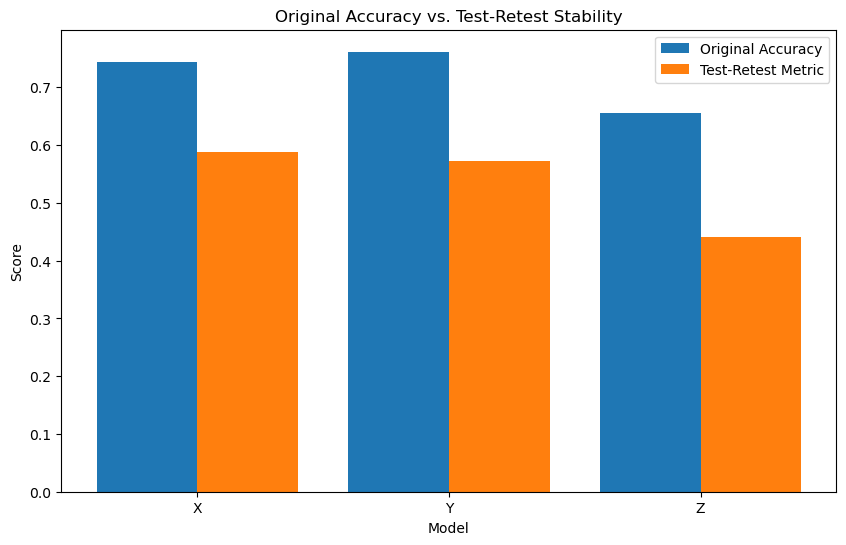

In [88]:
#fancy code
df_shuffled_mmlu = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')

def test_retest(test, retest):
    
    assert len(test) == len(retest), "Datasets must have the same length"

    # Convert 'correct' column to binary (1 for True, 0 otherwise) so we can multiply them all together
    test_correct = (test['correct'] == True).astype(int)
    retest_correct = (retest['correct'] == True).astype(int)

    # Compute test-retest metric
    test_retest_metric = (test_correct * retest_correct).mean()
    
    return test_retest_metric

metrics = []
for model in df_mmlu['model_name'].unique():
    test = df_mmlu[df_mmlu['model_name'] == model]
    retest = df_shuffled_mmlu[df_shuffled_mmlu['model_name'] == model]

    original_accuracy = test['correct'].mean()
    test_retest_metric = test_retest(test, retest)
    
    metrics.append((model, original_accuracy, test_retest_metric))
    print(f"Test-Retest Metric for {model}: {test_retest_metric:.4f}")

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Original Accuracy', 'Test-Retest Metric'])

plt.figure(figsize=(10, 6))
x = range(len(metrics_df))

plt.bar(x, metrics_df['Original Accuracy'], width=0.4, label='Original Accuracy', align='center')
plt.bar([i + 0.4 for i in x], metrics_df['Test-Retest Metric'], width=0.4, label='Test-Retest Metric', align='center')

plt.xticks([i + 0.2 for i in x], metrics_df['Model'])
plt.ylabel('Score')
plt.xlabel('Model')
plt.title('Original Accuracy vs. Test-Retest Stability')
plt.legend()

plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

Answer Distribution by Model
result         A     B     C     D
model_name                        
X           4259  2659  2409  2369
Y           1072  2256  3015  5353
Z           2176  2885  3237  3398

Accuracy Conditioned on Answer Given
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139


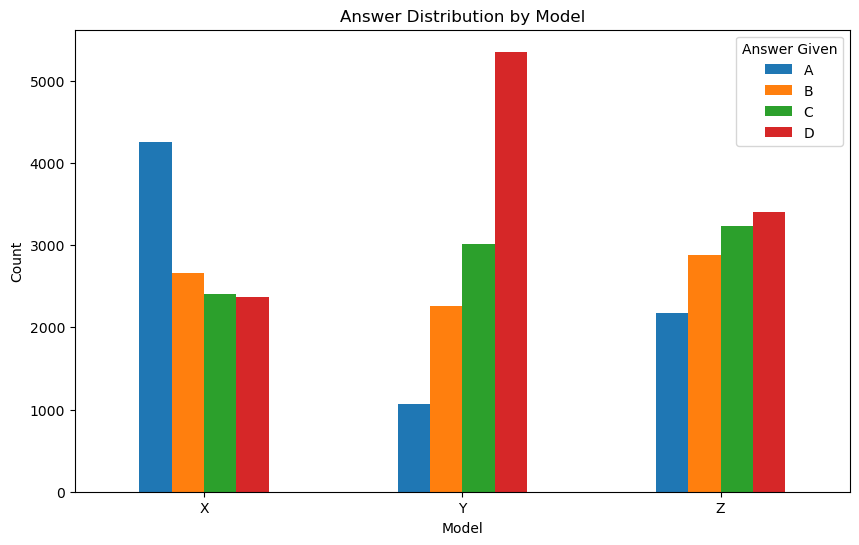

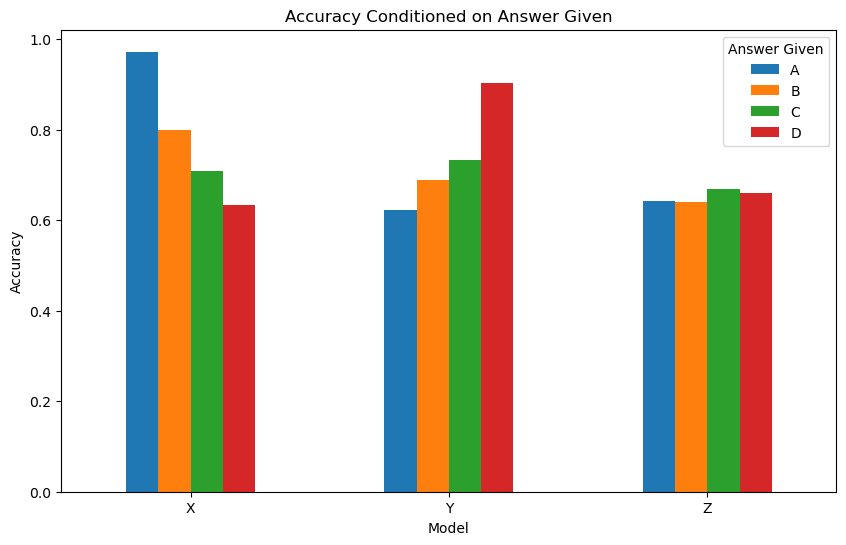

In [100]:
#A

answer_distribution = df_mmlu.groupby(['model_name', 'result']).size().unstack()
mmlu_conditioned_mean = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean().unstack()


print("Answer Distribution by Model")
print(answer_distribution.to_string())  

print("\nAccuracy Conditioned on Answer Given")
print(mmlu_conditioned_mean.to_string())

# Plot Answer Distribution
answer_distribution.plot(kind='bar', figsize=(10, 6))
plt.title("Answer Distribution by Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.legend(title="Answer Given")
plt.xticks(rotation=0)
plt.show()

# Plot Accuracy by Given Answer
mmlu_conditioned_mean.plot(kind='bar', figsize=(10, 6))
plt.title("Accuracy Conditioned on Answer Given")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(title="Answer Given")
plt.xticks(rotation=0)
plt.show()

B. /Discuss:/

Model X has a high frequency of choosing A while the other choices are more balanced, Model Y has a even greater preference for D, the other being in decreasing order with A as the last, Model Z confirms to be more balanced in its frequency of answers.

For what regards the conditioned accuracy we can now understand how the bias of the models reflected on to their accuracy, this is because the accuracy will be high on the choices that are most often taken because of how the accuracy is calculated.

One possible explanation is that the models overfitted to their traning datasets and hence carry on the imbalances of these.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [102]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package') 
    %pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [91]:
#A

In [92]:
#B

In [93]:
#C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [94]:
#A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [95]:
#A

B. /Discuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.